In [1]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = r'./elapseTime.csv' 
df = pd.read_csv(filename)
df

,block_height,elapsed_time
0,1,2m53.376816683s
1,2,3m24.504237342s
2,3,13.263856555s
3,4,8m31.163773571s
4,5,2m44.392010422s
...,...,...
1152,1153,27.079684031s
1153,1154,1m53.428859613s
1154,1155,53.045717259s
1155,1156,1m35.692452258s


In [3]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 600 + float(second) + float(ms) / 100)



Elasped time :  2m53.376816683s
Elasped time :  3m24.504237342s
Elasped time :  13.263856555s
Elasped time :  8m31.163773571s
Elasped time :  2m44.392010422s
Elasped time :  20.954342509s
Elasped time :  16.689777863s
Elasped time :  2m30.321406096s
Elasped time :  1m10.962926158s
Elasped time :  30.540573503s
Elasped time :  33.057599785s
Elasped time :  1m58.645488927s
Elasped time :  6.896590058s
Elasped time :  7.277946636s
Elasped time :  54.713830512s
Elasped time :  48.652636433s
Elasped time :  23.869661848s
Elasped time :  17.820637234s
Elasped time :  1m46.669008174s
Elasped time :  2.084908473s
Elasped time :  3m11.355263005s
Elasped time :  57.606880205s
Elasped time :  53.83599345s
Elasped time :  1m32.823558747s
Elasped time :  2m29.062678122s
Elasped time :  1m4.081755759s
Elasped time :  35.218024349s
Elasped time :  1m5.062164893s
Elasped time :  2m39.459121053s
Elasped time :  1m30.814675823s
Elasped time :  46.110044936s
Elasped time :  2m19.294585211s
Elasped time :

In [4]:
df

,block_height,elapsed_time
0,1,1253.376816683
1,2,1824.504237342
2,3,13.263856555
3,4,4831.163773571
4,5,1244.392010422
...,...,...
1152,1153,27.079684031
1153,1154,653.428859613
1154,1155,53.045717259
1155,1156,635.692452258


In [5]:
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0       1253.376816683
1       1824.504237342
2         13.263856555
3       4831.163773571
4       1244.392010422
             ...      
1152      27.079684031
1153     653.428859613
1154      53.045717259
1155     635.692452258
1156        3.44521256
Name: elapsed_time, Length: 1157, dtype: object

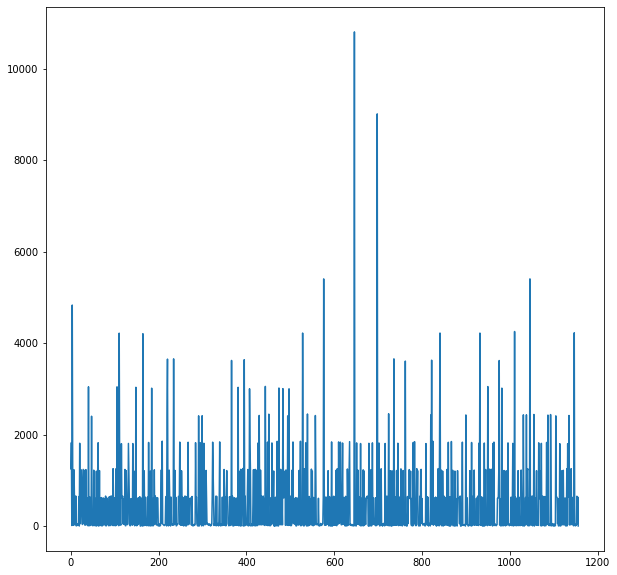

In [6]:
frame = frame.astype(float)
frame.plot(figsize=(10,10))

In [7]:
import numpy as np
log_frame = np.log(frame)

In [8]:
frame

0       1253.376817
1       1824.504237
2         13.263857
3       4831.163774
4       1244.392010
           ...     
1152      27.079684
1153     653.428860
1154      53.045717
1155     635.692452
1156       3.445213
Name: elapsed_time, Length: 1157, dtype: float64

In [9]:
log_frame

0       7.133597
1       7.509064
2       2.585043
3       8.482843
4       7.126402
          ...   
1152    3.298784
1153    6.482234
1154    3.971154
1155    6.454715
1156    1.236986
Name: elapsed_time, Length: 1157, dtype: float64

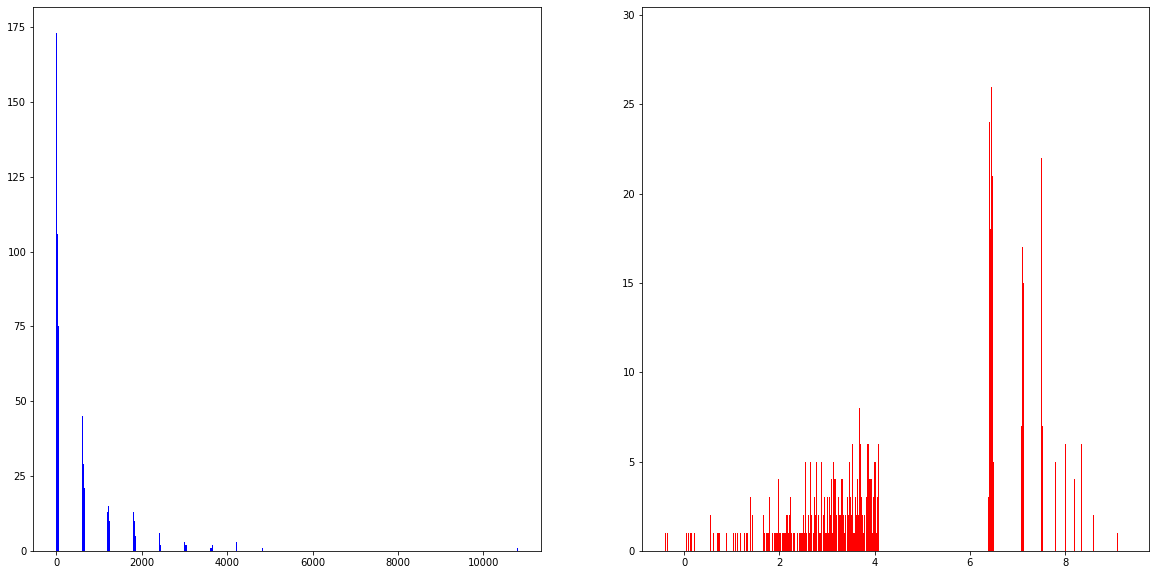

NameError: name 'savefig' is not defined

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=1157, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=1157, color='r')
plt.show()

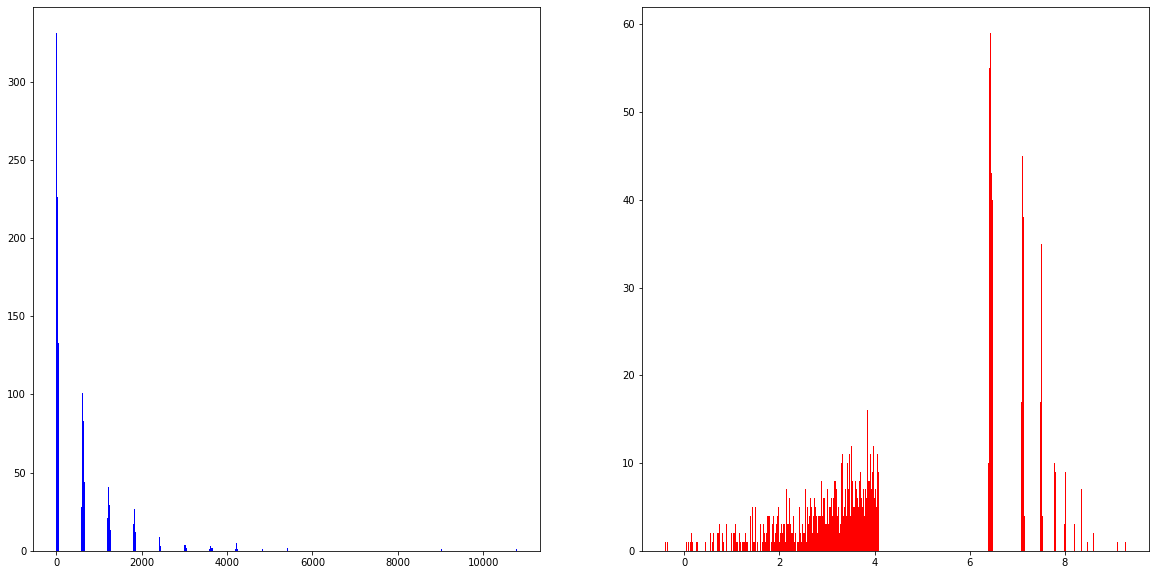

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=500, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=500, color='r')
plt.show()

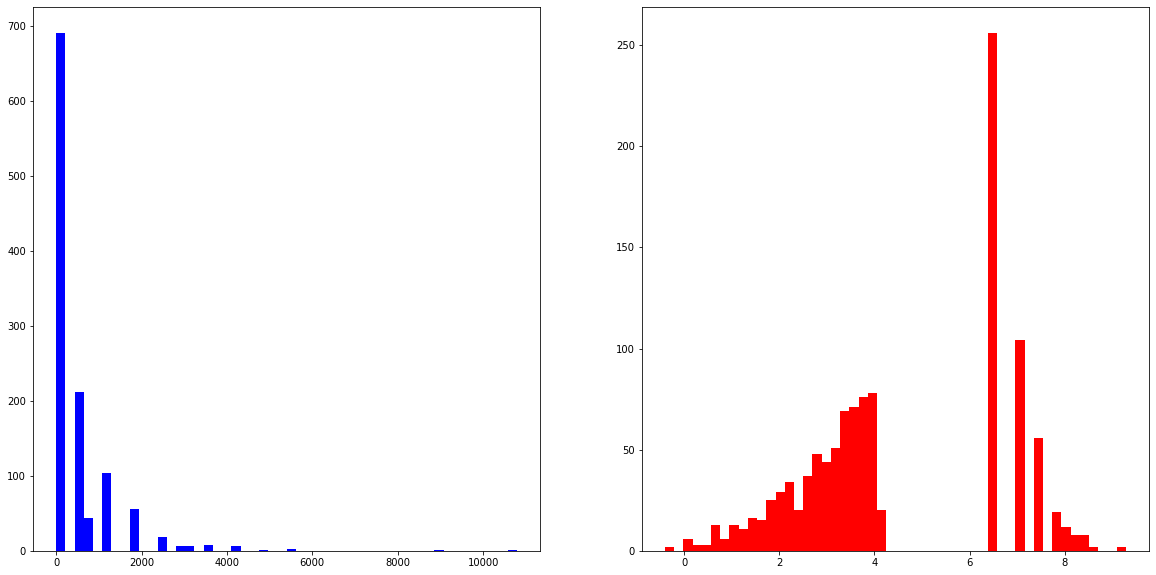

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=50, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=50, color='r')
plt.show()

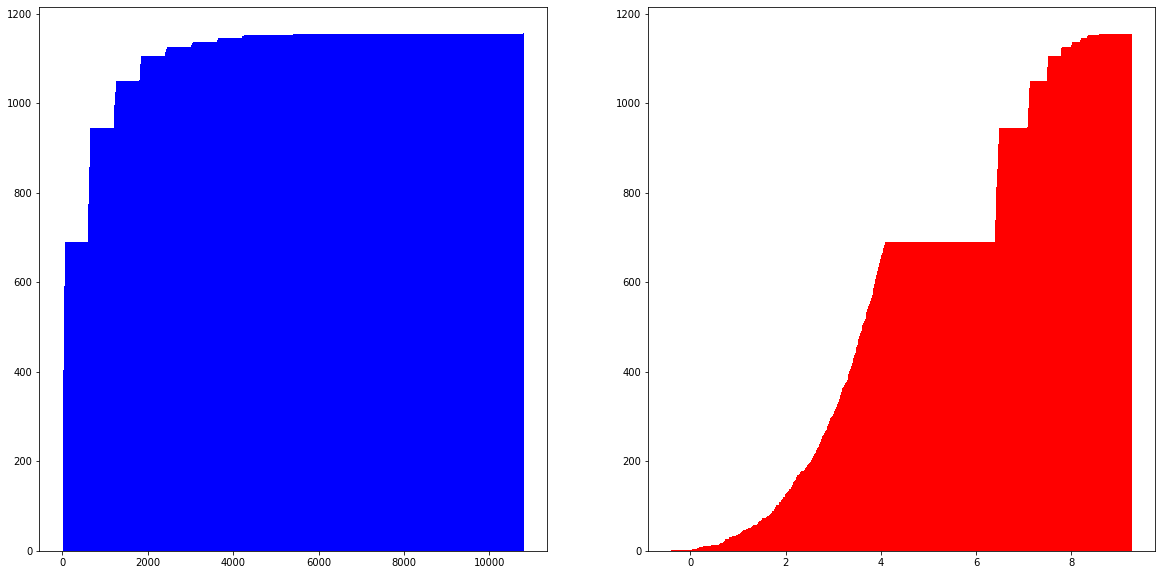

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=1156, cumulative = True, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=1156, cumulative = True, color='r')
plt.show()